In [1]:
!wget --no-check-certificate \
  https://github.com/iamskab/Simple-CNN/blob/main/blob/master/train.zip?raw=true \
  -O /tmp/train.zip

--2021-04-10 07:59:44--  https://github.com/iamskab/Simple-CNN/blob/main/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/iamskab/Simple-CNN/raw/main/blob/master/train.zip [following]
--2021-04-10 07:59:44--  https://github.com/iamskab/Simple-CNN/raw/main/blob/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/iamskab/Simple-CNN/main/blob/master/train.zip [following]
--2021-04-10 07:59:44--  https://raw.githubusercontent.com/iamskab/Simple-CNN/main/blob/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [2]:
!wget --no-check-certificate \
  https://github.com/iamskab/Simple-CNN/blob/main/blob/master/valid.zip?raw=true \
  -O /tmp/valid.zip

--2021-04-10 08:00:09--  https://github.com/iamskab/Simple-CNN/blob/main/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/iamskab/Simple-CNN/raw/main/blob/master/valid.zip [following]
--2021-04-10 08:00:10--  https://github.com/iamskab/Simple-CNN/raw/main/blob/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/iamskab/Simple-CNN/main/blob/master/valid.zip [following]
--2021-04-10 08:00:10--  https://raw.githubusercontent.com/iamskab/Simple-CNN/main/blob/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [3]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

local_zip = '/tmp/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

In [4]:
# Directory with our training bmt pictures
train_bmt_dir = os.path.join('/tmp/train/BMT')

# Directory with our training dmt pictures
train_dmt_dir = os.path.join('/tmp/train/DMT')

# Directory with our validation bmt pictures
valid_bmt_dir = os.path.join('/tmp/valid/BMT')

# Directory with our validation dmt pictures
valid_dmt_dir = os.path.join('/tmp/valid/DMT')

In [5]:
train_bmt_names = os.listdir(train_bmt_dir)
print(train_bmt_names[:10])

train_dmt_names = os.listdir(train_dmt_dir)
print(train_dmt_names[:10])

validation_bmt_hames = os.listdir(valid_bmt_dir)
print(validation_bmt_hames[:10])

validation_dmt_names = os.listdir(valid_dmt_dir)
print(validation_dmt_names[:10])

['window44.png', 'window39.png', 'window45.png', 'window28.png', 'window29.png', 'window34.png', 'window23.png', 'window19.png', 'window6.png', 'window26.png']
['window44.png', 'window39.png', 'window45.png', 'window28.png', 'window29.png', 'window34.png', 'window23.png', 'window19.png', 'window6.png', 'window26.png']
['window54.png', 'window55.png', 'window46.png', 'window51.png', 'window47.png', 'window57.png', 'window49.png', 'window53.png', 'window58.png', 'window50.png']
['window54.png', 'window55.png', 'window46.png', 'window51.png', 'window47.png', 'window57.png', 'window49.png', 'window53.png', 'window58.png', 'window50.png']


In [6]:
print('total training bmt images:', len(os.listdir(train_bmt_dir)))
print('total training dmt images:', len(os.listdir(train_dmt_dir)))
print('total validation bmt images:', len(os.listdir(valid_bmt_dir)))
print('total validation dmt images:', len(os.listdir(valid_dmt_dir)))

total training bmt images: 45
total training dmt images: 45
total validation bmt images: 13
total validation dmt images: 13


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

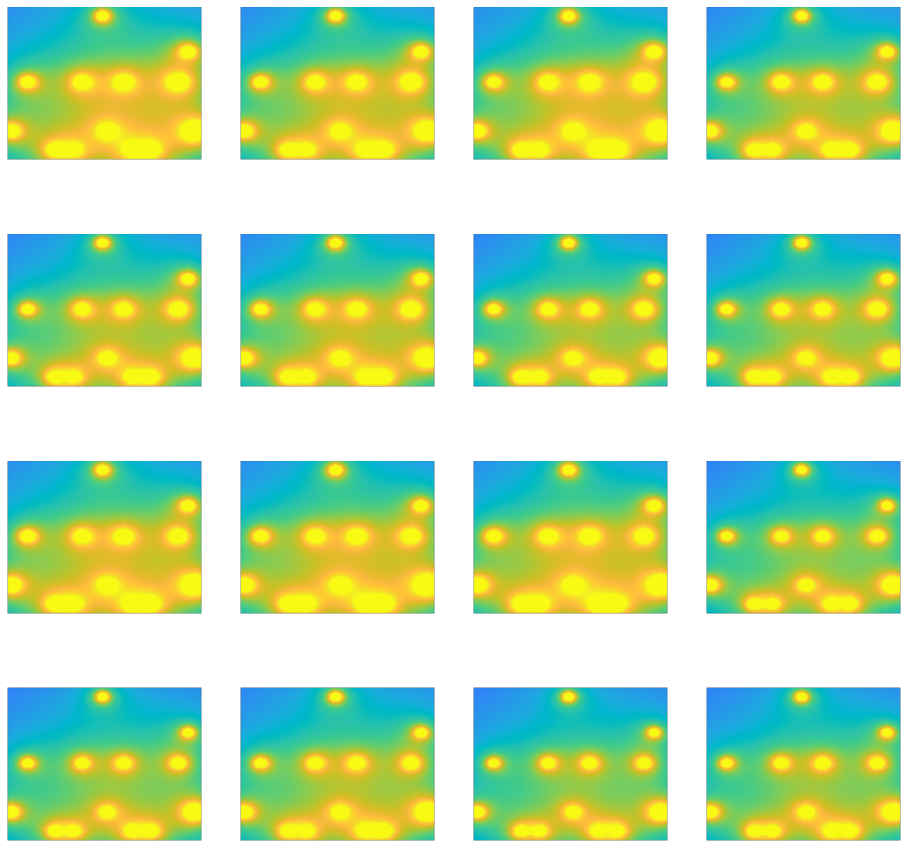

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_bmt_pic = [os.path.join(train_bmt_dir, fname) 
                for fname in train_bmt_names[pic_index-8:pic_index]]
next_dmt_pic = [os.path.join(train_dmt_dir, fname) 
                for fname in train_dmt_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bmt_pic + next_dmt_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Data Preprocessing 

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['BMT', 'DMT'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=15,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['BMT', 'DMT'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=7,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 90 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


### Building Model from Scratch

In [10]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15360128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
      steps_per_epoch=6,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=7)

Epoch 1/15
6/6 [==============================] - 2s 314ms/step - loss: 17.5693 - accuracy: 0.5268 - val_loss: 2.9326 - val_accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 1s 173ms/step - loss: 4.3111 - accuracy: 0.4389
Epoch 3/15
6/6 [==============================] - 1s 169ms/step - loss: 1.6132 - accuracy: 0.5551
Epoch 4/15
6/6 [==============================] - 1s 175ms/step - loss: 0.7375 - accuracy: 0.7279
Epoch 5/15
6/6 [==============================] - 1s 178ms/step - loss: 0.8178 - accuracy: 0.6833
Epoch 6/15
6/6 [==============================] - 1s 170ms/step - loss: 0.7064 - accuracy: 0.7241
Epoch 7/15
6/6 [==============================] - 1s 177ms/step - loss: 0.9186 - accuracy: 0.6765
Epoch 8/15
6/6 [==============================] - 1s 173ms/step - loss: 1.3176 - accuracy: 0.5559
Epoch 9/15
6/6 [==============================] - 1s 175ms/step - loss: 0.7005 - accuracy: 0.7362
Epoch 10/15
6/6 [==============================] - 1s 171ms/step - loss: 0.

Accuracy , ROC Curve and AUC

In [15]:
model.evaluate(validation_generator)

4/4 [==============================] - 0s 61ms/step - loss: 0.2964 - accuracy: 0.8462


[0.29638323187828064, 0.8461538553237915]

In [16]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

4/4 [==============================] - 0s 60ms/step


In [17]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [18]:
roc_auc = auc(fpr, tpr)

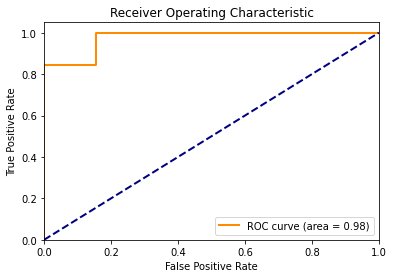

In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Saving window48.png to window48.png
[1.]
window48.png is a dmt


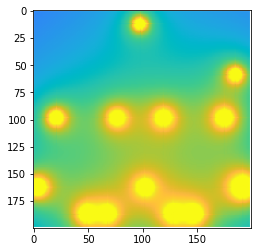

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a bmt")
  else:
    print(fn + " is a dmt")